# Test 1: Jaccard Similarity

<font size=4px>1. Function to split words into its character list</font>

In [22]:
def splitChar(word):
    characters = []
    for char in word:
        characters.append(char)
    return characters

<font size=4px>2. To calculate Jaccard similarity b/w a word (from wrong spelling dataset) and valid_careers_set</font>

In [23]:
def jaccard(str1, set2):
    set1 = set(splitChar(str1))

    intersection = set1 & set2
    union = set1 | set2
    
    return len(intersection)/len(union)

<font size=4px>3. To change the valid_careers data to its set of character for each word</font>

In [24]:
def career_set(careers):
    vcs=[]
    for career in careers:
        career_char = set(splitChar(career))
        vcs.append(career_char)
    return vcs

<font size = 4px>4. Importing data from Excel file using pandas</font>

In [25]:
import pandas as pd

df = pd.read_excel("TaskData.xlsx", header=None, names=['Careers'], dtype={'Careers':'object'})
df['Careers']=df['Careers'].str.upper() # Uppercased the data to ignore case different mearasures
df.head(5)

,Careers
0,COKTER
1,DENTIISTS
2,ENGINIR
3,POLICE
4,ENGNEIEAR


<font size=4px>5. Valid careers and their character form</font>

In [26]:
valid_careers = ['ENGINEER', 'TEACHER', 'DENTIST', 'NURSE', 'LAWYER', 'DOCTOR', 'POLICE', 'ARCHITECT', 'ACCOUNTANT', 'PHARMACIST']
valid_careers_set = career_set(valid_careers)

<font size = 4px>6. This 'for' loop iterates over the dataset of misspelled careers and compares with the valid careers to find the closest match using the jaccard similarity value (z). The higher the value of z, the more similar it is.</font>

In [27]:
i=0
for career in df['Careers']:
    maxi=-1
    for index in range(len(valid_careers_set)):
        z = jaccard(career, valid_careers_set[index])
        if z>maxi:
            maxi=z
            expected=valid_careers[index]
            

    df.at[i, 'Careers']=expected
    i+=1

In [31]:
df.head(5)

,Careers
0,DOCTOR
1,DENTIST
2,ENGINEER
3,POLICE
4,ENGINEER


In [32]:
df.to_excel("TaskData.xlsx", index=False)  # Export the corrected spelling in the Excel file

In [29]:
career_counts = df['Careers'].value_counts()  # Calculate the frequency of each career

<font size=4 px>6. Plot the frequency of each career in a bar chart using mtplotlib</font>

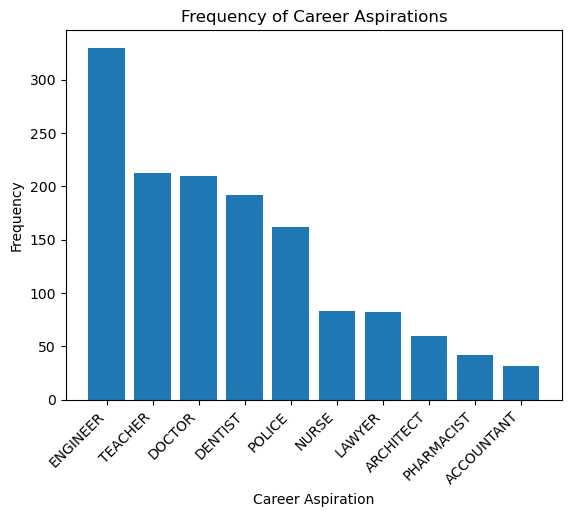

In [30]:
import matplotlib.pyplot as plt

plt.bar(career_counts.index, career_counts.values)  # Plot the bar chart in decreasing order
# Label x & y axis and give a title to the plot
plt.xlabel("Career Aspiration")
plt.ylabel("Frequency")
plt.title("Frequency of Career Aspirations")

plt.xticks(rotation=45, ha='right')  # Rotate x-labels by 45 deg for readability
plt.show()